In [1]:
import cv2
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np
%matplotlib inline

# 1. Define functions:

In [62]:
def displayData(img, template, color=False):
    plt.rcParams['figure.figsize'] = [10,8]
    fig, (origin, temp) = plt.subplots(1, 2)
    if color:
        origin.imshow(img[:,:,::-1])
        temp.imshow(template[:,:,::-1])
    else: 
        origin.imshow(img, cmap="gray")
        temp.imshow(template, cmap="gray")
        
    origin.set_title("original image")
    origin.axis('off')
    temp.set_title("template")
    temp.axis('off')

#convert origin image from RGB to GRAY
def fillGray(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def calculate(img, template, meth="cv2.TM_CCORR"):
    method = eval(meth)
    if len(img.shape) == 3:
        print("3 channels image")
        b, r, g = cv2.split(img)
        temp_b, temp_r, temp_g = cv2.split(template)

        res_b = cv2.matchTemplate(b, temp_b, method)
        res_r = cv2.matchTemplate(r, temp_r, method)
        res_g = cv2.matchTemplate(g, temp_g, method)
        res = np.add((res_b), (res_r), (res_g))
    
    else: 
        res = cv2.matchTemplate(img, template, method)
    
    #finding max location
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if meth == "cv2.TM_SQDIFF":
        print("min point's location: ", min_loc)
        return res, min_loc
    else:
        print("max point's location: ", max_loc)
        return res, max_loc
    

#display original image with bounding box and result after calculated
def displayResult(img, template, res, max_loc, color=False):
    #pylot image and bounding box
    h, w = template.shape
    top_left = max_loc
    bottom_right = ((max_loc[0] + w), (max_loc[1] + h))
    
    plt.rcParams['figure.figsize'] = [12,10]
    fig, (origin, bound) = plt.subplots(1, 2)
    img2 = img.copy()
    cv2.rectangle(img2, top_left, bottom_right, (0, 255, 0),2)
    if color:
        origin.imshow(img2[:,:,::-1])
    else: origin.imshow(img2, cmap="gray")
    bound.imshow(res, cmap="gray")
    origin.axis('off')
    bound.axis('off')

#display result after calculated with 3D graph (z refer to image capacity)
def display3DResult(res):
    h, w = res.shape
    plt.rcParams['figure.figsize'] = [10,8]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x = range(0, w)
    y = range(0, h)
    
    X, Y = np.meshgrid(x, y)
    print(X.shape, Y.shape, res.shape)
    ax.plot_surface(X, Y, res[::-1])
    plt.show()
    
#display result after 2D graph
def displayContour(res):
    h, w = res.shape
    plt.rcParams['figure.figsize'] = [8,6]
    
    x = range(0, w)
    y = range(0, h)
    X, Y = np.meshgrid(x, y)
    
    fig, ax = plt.subplots(1,1)
    cp = ax.contourf(X, Y, res[::-1])
    fig.colorbar(cp)
    ax.axis('off')
    plt.show()

# 2. Basic template matching using Cross-correlation:

#### Example 1

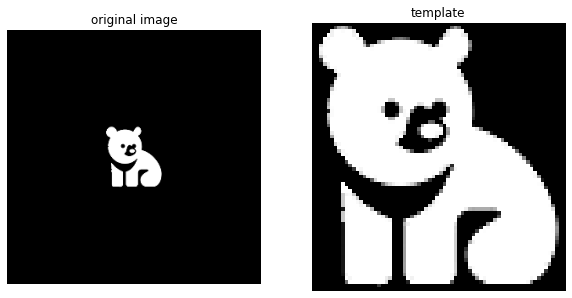

In [3]:
teddy_1 = cv2.imread("teddy-1.png")
teddy_template_1 = cv2.imread("teddy-template-1.png")

teddy_1 = fillGray(teddy_1)
teddy_template_1 = fillGray(teddy_template_1)

displayData(teddy_1, teddy_template_1)

In [4]:
res_t1, loc_t1 = calculate(teddy_1, teddy_template_1, "cv2.TM_CCORR")

max point's location:  (115, 113)


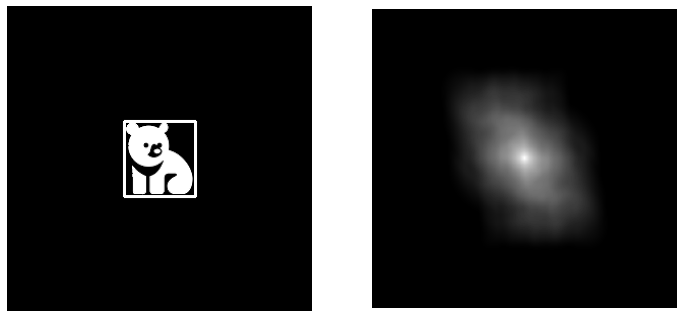

In [52]:
displayResult(teddy_1, teddy_template_1, res_t1, loc_t1)

#### Example 2

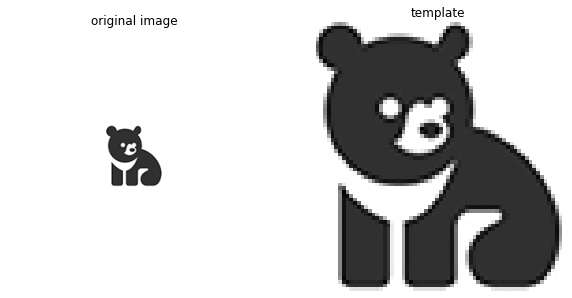

In [6]:
teddy_2 = cv2.imread("teddy-2.png")
teddy_template_2 = cv2.imread("teddy-template-2.png")
teddy_2 = fillGray(teddy_2)
teddy_template_2 = fillGray(teddy_template_2)

displayData(teddy_2, teddy_template_2)

In [7]:
res_t2, loc_t2 = calculate(teddy_2, teddy_template_2, "cv2.TM_CCORR")

max point's location:  (36, 122)


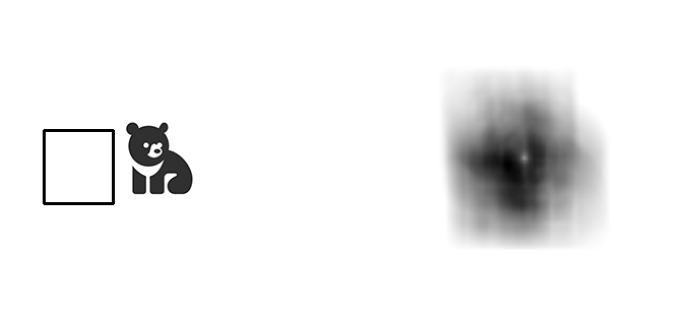

In [8]:
displayResult(teddy_2, teddy_template_2, res_t2, loc_t2)

Note: 
- The algorithm are fail to detect the position of the object *(teddy-bear)*
- This problem occurs because there are large white areas in the image that was correlated to each other
- In this case, large white area was the background, so that the algorithm detected the background *(which have largest value)*

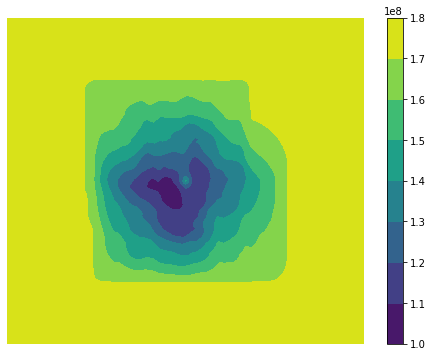

In [9]:
displayContour(res_t2)

Note:
- This 2D graph shows us where are the brightest areas of the result after we've done the template matching algorithm
- Brightest areas are shown yellow

# 3. Template matching using Correlation coefficient

#### Example 3

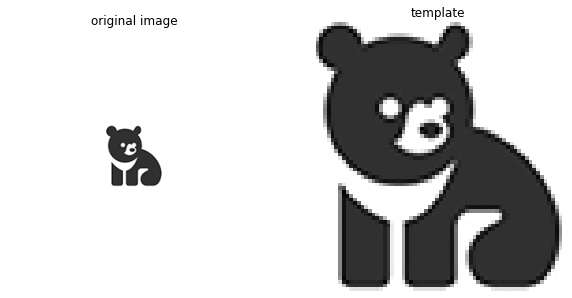

In [10]:
displayData(teddy_2, teddy_template_2)

In [11]:
res_t2, loc_t2 = calculate(teddy_2, teddy_template_2, "cv2.TM_CCOEFF")

max point's location:  (116, 114)


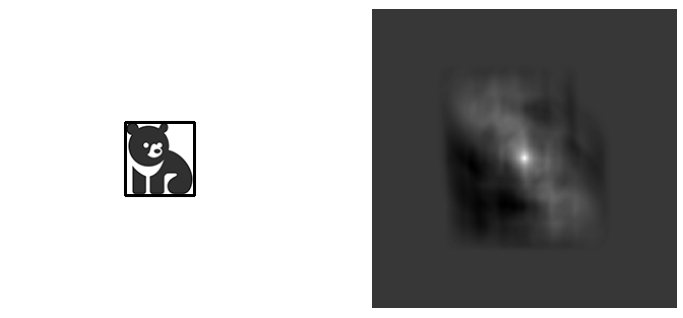

In [12]:
displayResult(teddy_2, teddy_template_2, res_t2, loc_t2)

(229, 233) (229, 233) (229, 233)


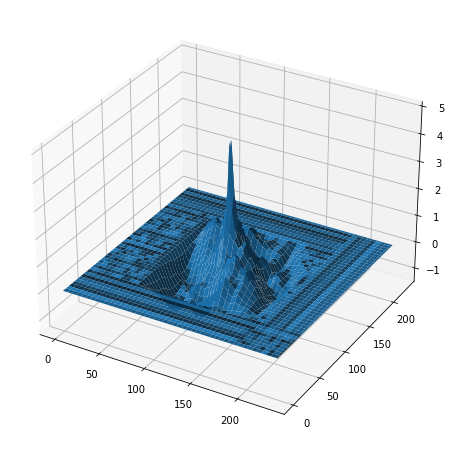

In [13]:
display3DResult(res_t2)

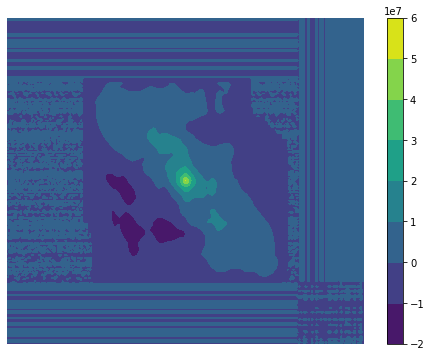

In [14]:
displayContour(res_t2)

## Template matching with distortion

#### Example 4

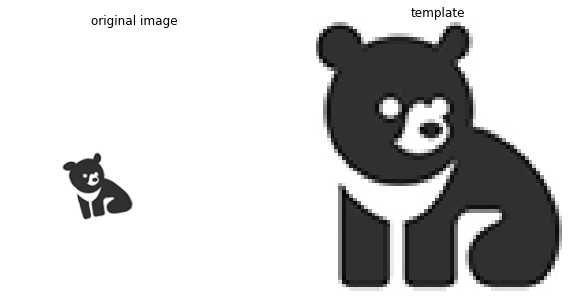

In [15]:
teddy_4 = cv2.imread("teddy-4.png")
teddy_4 = fillGray(teddy_4)
teddy_template_4 = teddy_template_2

displayData(teddy_4, teddy_template_4)

In this example, I slightly rotate and bend the teddy-bear.

In [16]:
res_t4, loc_t4 = calculate(teddy_4, teddy_template_4, "cv2.TM_CCOEFF")

max point's location:  (75, 149)


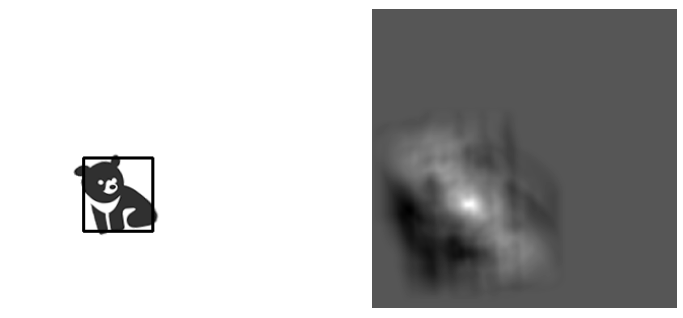

In [17]:
displayResult(teddy_4, teddy_template_4, res_t4, loc_t4)

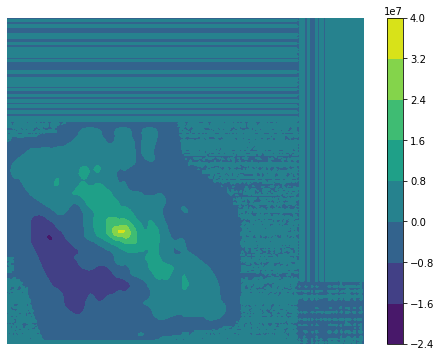

In [18]:
displayContour(res_t4)

The result looks amazing, the brightest point in contour graph is center point.

### Example 5

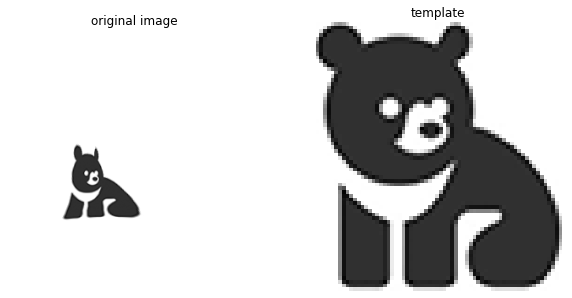

In [19]:
teddy_5 = cv2.imread("teddy-5.png")
teddy_5 = fillGray(teddy_5)
teddy_template_5 = teddy_template_2

displayData(teddy_5, teddy_template_5)

In [20]:
res_t5, loc_t5 = calculate(teddy_5, teddy_template_5, "cv2.TM_CCOEFF")

max point's location:  (72, 149)


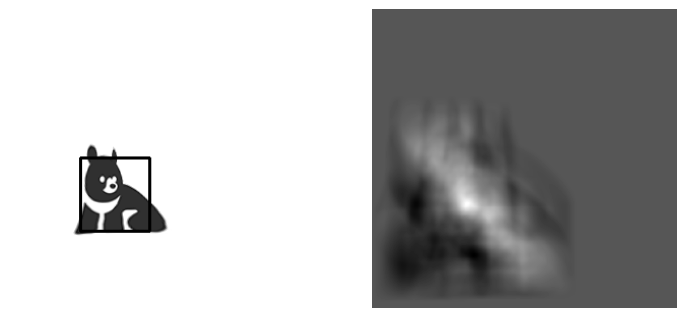

In [21]:
displayResult(teddy_5, teddy_template_5, res_t5, loc_t5)

(229, 233) (229, 233) (229, 233)


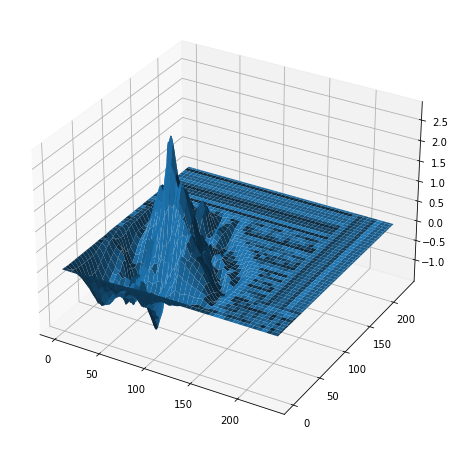

In [22]:
display3DResult(res_t5)

Because of the bend, the result after operate look flatter than example-4

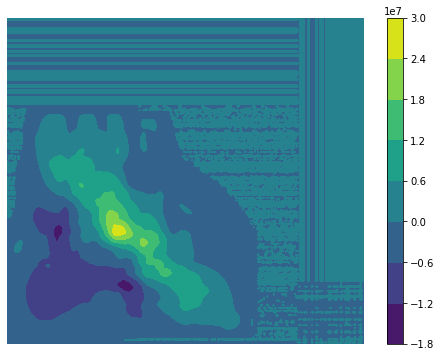

In [23]:
displayContour(res_t5)

#### Example 6

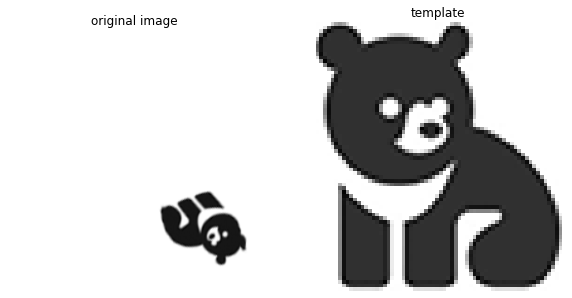

In [24]:
teddy_6 = cv2.imread("teddy-6.png")
teddy_6 = fillGray(teddy_6)
teddy_template_6 = teddy_template_2

displayData(teddy_6, teddy_template_6)

In [58]:
res_t6, loc_t6 = calculate(teddy_6, teddy_template_6, "cv2.TM_CCOEFF")

max point's location:  (209, 189)


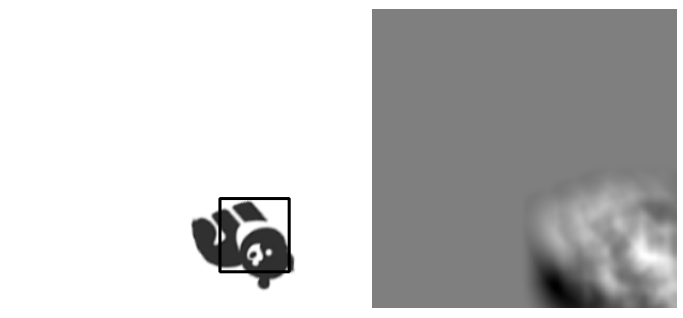

In [59]:
displayResult(teddy_6, teddy_template_6, res_t6, loc_t6)

## Correlation coefficient with realife image

### Test 1:

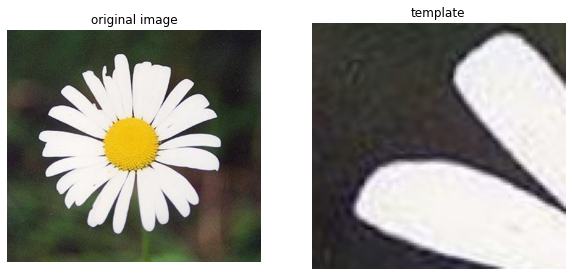

In [27]:
flower = cv2.imread("flower.jpg")
flower_gray = fillGray(flower)

flower_template = cv2.imread("flower_template.png")
flower_template_gray = fillGray(flower_template)

displayData(flower, flower_template, True)

In [28]:
res_flower, loc_flower = calculate(flower_gray, flower_template_gray, "cv2.TM_CCOEFF")

max point's location:  (68, 112)


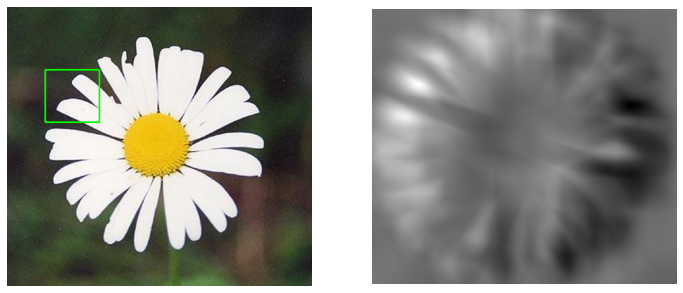

In [29]:
displayResult(flower.copy(), flower_template_gray, res_flower, loc_flower, True)

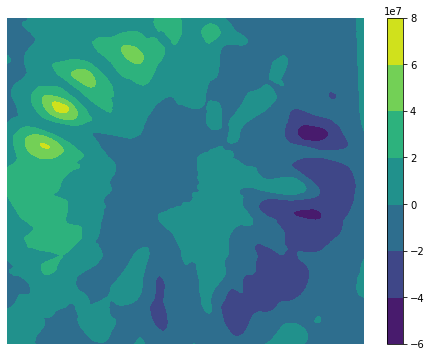

In [30]:
displayContour(res_flower)

### Test 2:

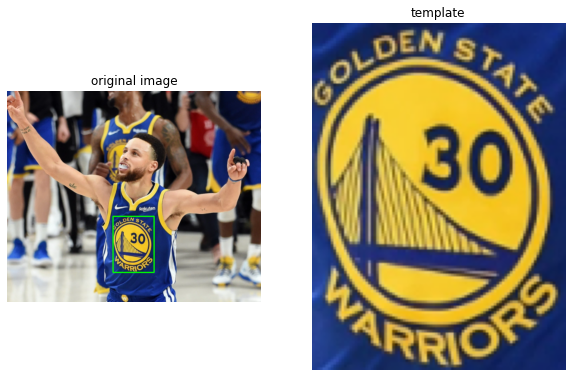

In [31]:
steph = cv2.imread("steph.png")
steph_template = steph[290:420, 245:340]
steph_template_gray = fillGray(steph_template)

temp = steph.copy()

cv2.rectangle(temp, (245, 290), (340, 420), (0,255,0),2)
displayData(temp, steph_template, True)

This is the original image, i cropped the team's logo and use it as a template for later test

Text(0.5, 1.0, 'current image')

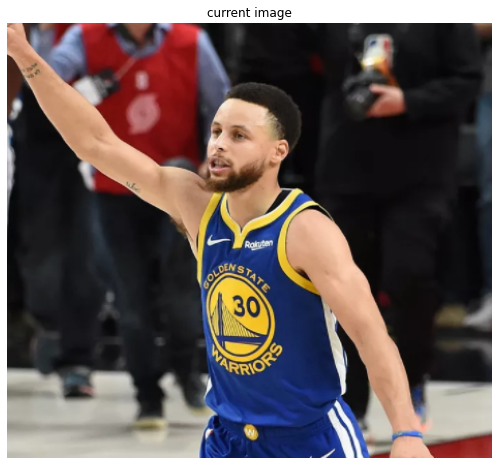

In [32]:
steph1 = cv2.imread("steph1.png")
steph1_gray = fillGray(steph1)

plt.imshow(steph1[:,:,::-1])
plt.axis('off')
plt.title("current image")

In [60]:
res_steph1, loc_steph1 = calculate(steph1_gray, steph_template_gray, "cv2.TM_CCOEFF")

max point's location:  (173, 218)


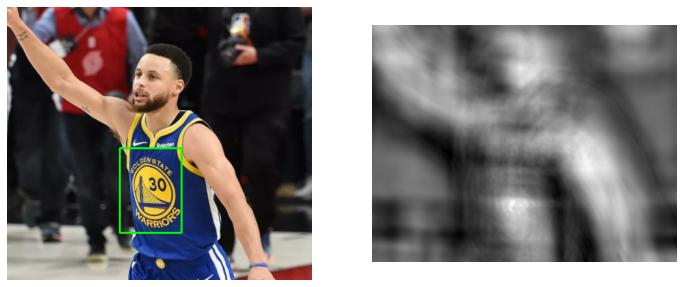

In [61]:
displayResult(steph1, steph_template_gray, res_steph1, loc_steph1, True)

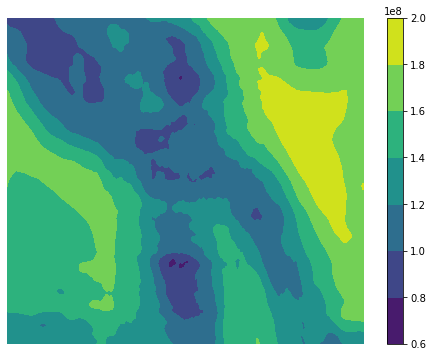

In [35]:
displayContour(res_steph1)

### Test 3

Does number of channel really matter the outcome result?

Text(0.5, 1.0, 'current image')

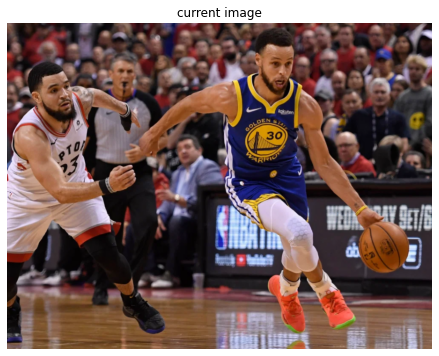

In [36]:
steph2 = cv2.imread("steph2.png")
steph2_gray = fillGray(steph2)

plt.imshow(steph2[:,:,::-1])
plt.axis('off')
plt.title("current image")

In [57]:
res_steph2, loc_steph2 = calculate(steph2_gray, steph_template_gray, "cv2.TM_CCOEFF")

max point's location:  (554, 374)


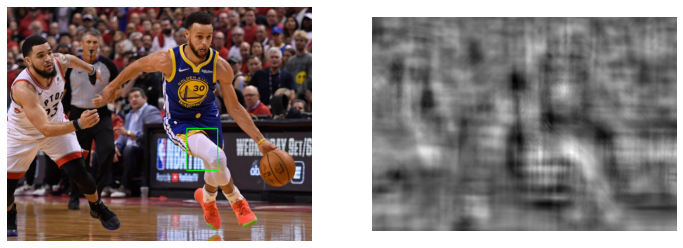

In [38]:
displayResult(steph2, steph_template_gray, res_steph2, loc_steph2, True)

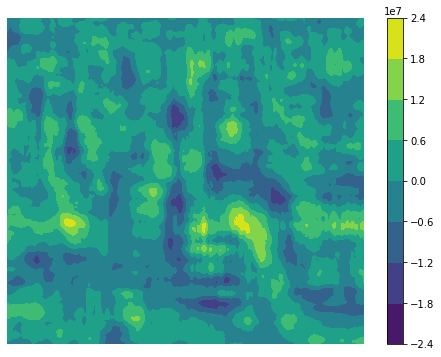

In [39]:
displayContour(res_steph2)

In this test, we can immediately see that the detection was totally wrong.

But what happend if we add red, green, blue channels and stop calculate the gray channel?

In [40]:
res_steph2, loc_steph2 = calculate(steph2, steph_template, "cv2.TM_CCOEFF")

3 channels image
max point's location:  (534, 201)


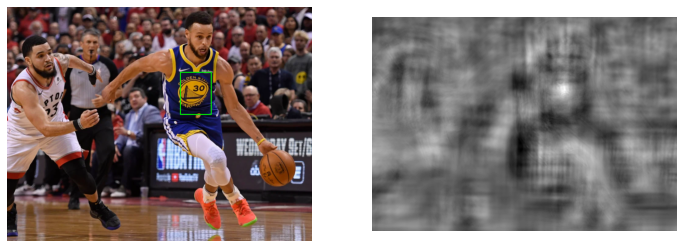

In [41]:
displayResult(steph2, steph_template_gray, res_steph2, loc_steph2, True)

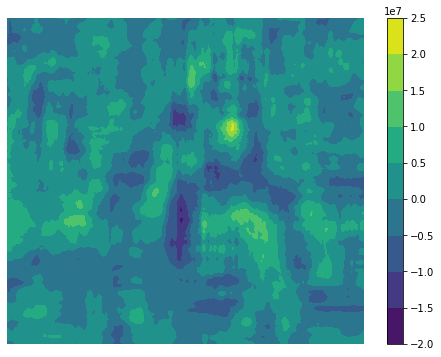

In [42]:
displayContour(res_steph2)

This countour was beautiful, there is only 1 brightest point which is the logo position.

So that, the number of channel we put in to calculation does affect the outcome!

### Test 4

Text(0.5, 1.0, 'current image')

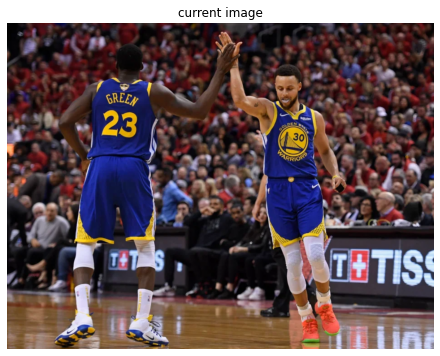

In [43]:
steph4 = cv2.imread("steph4.png")

plt.imshow(steph4[:,:,::-1])
plt.axis('off')
plt.title("current image")

In [44]:
res_steph4, loc_steph4 = calculate(steph4, steph_template, "cv2.TM_CCOEFF")

3 channels image
max point's location:  (653, 236)


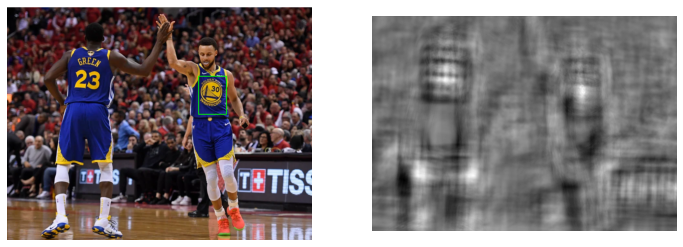

In [45]:
displayResult(steph4, steph_template_gray, res_steph4, loc_steph4, True)

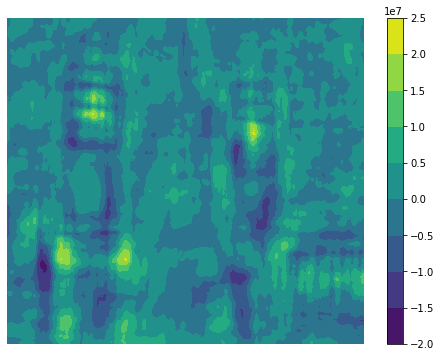

In [46]:
displayContour(res_steph4)

### Test 5

Text(0.5, 1.0, 'current image')

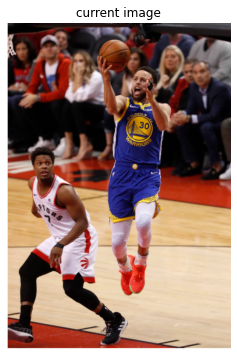

In [47]:
steph3 = cv2.imread("steph3.png")
steph3_gray = fillGray(steph3)

plt.imshow(steph3[:,:,::-1])
plt.axis('off')
plt.title("current image")

In [48]:
res_steph3, loc_steph3 = calculate(steph3, steph_template, "cv2.TM_CCOEFF")

3 channels image
max point's location:  (125, 671)


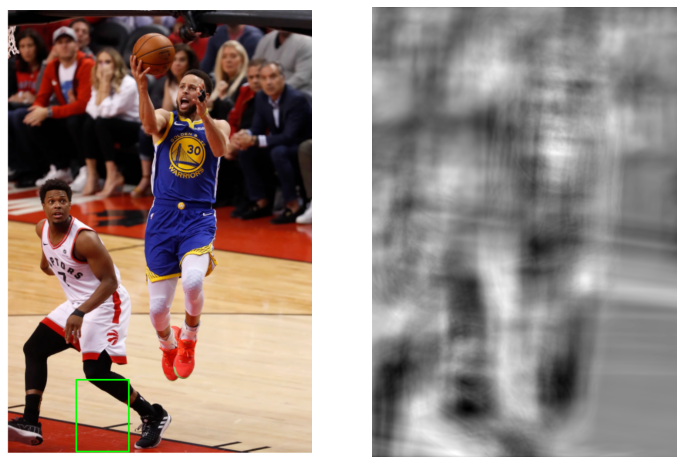

In [49]:
displayResult(steph3, steph_template_gray, res_steph3, loc_steph3, True)

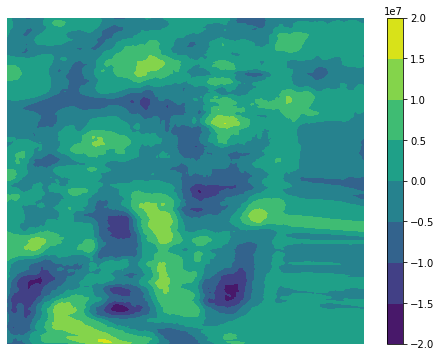

In [50]:
displayContour(res_steph3)

In the end, I started to wonder about the limit of this algorithm.

In the original image, there are many bright color and spread to huge areas.

And after calculated, the result was confused about the brightest point inside it. Is this the algorithm limit? 

This is the end of my research for the topic: **"Template matching with disortion"**

*Thank you for reading*

# END